# Study of events containing only two reconstructed jets

In this example, we access the reconstructed jet objects in `jets.core`, make di-jet combinations and look at the properties of the di-jets.

In [6]:
import sys,os
import uproot4 as uproot
import awkward1 as ak
import json
import numpy as np
import matplotlib.pyplot as plt
from fcc_python_tools.locations import loc
from fcc_python_tools import kinematics
from particle import literals as lp
from fcc_python_tools import plotting

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)

file = uproot.open("/eos/experiment/fcc/ee/tmp/fcc_python_tools/FCCDelphesOutput_0.root")
tree = file['events']

Access the jets:

In [7]:
jets_container = "jets.core"
jets = tree.arrays(filter_name=f"{jets_container}*",how="zip")
jets[jets_container,'p4.p'] = kinematics.calc_p(jets,jets_container)

Count the number of jets in each event and plot:

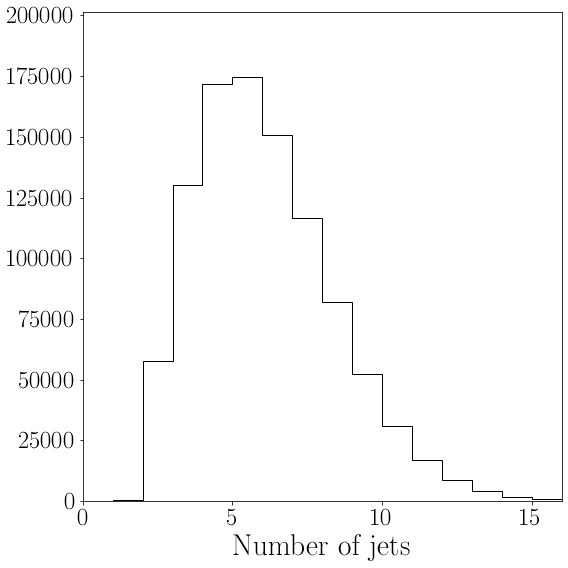

In [8]:
n_jets = ak.num(jets[jets_container])
plotting.hist_plot(n_jets,"n_jets","Number of jets",0,16,16)

Cut to select di-jet events, where we count the fraction of all events which contain only two jets:

In [13]:
dijet_cut = n_jets == 2
n_pass = np.sum(dijet_cut.tolist())
f_dijet = float(n_pass) / tree.num_entries
print(f"Number of di-jet events: {n_pass}")
print(f"Fraction of events which are di-jet: {f_dijet}")

Number of di-jet events: 57646
Fraction of events which are di-jet: 0.057646


Let's keep only the events with two jets, make di-jet combinations and look at their invariant mass and angle:

In [ ]:
jets = jets[dijet_cut]

jet_pairs = ak.combinations(jets[jets_container],2)
jets["j1"], jets["j2"] = ak.unzip(jet_pairs)
jets["j1_j2_angle"] = kinematics.cos_angle(jets["j1"], jets["j2"])
jets["j1_j2_mass"] = kinematics.mass([jets["j1"], jets["j2"]], [jets["j1","p4.mass"], jets["j2","p4.mass"]])

Plot the invariant mass of the di-jet:

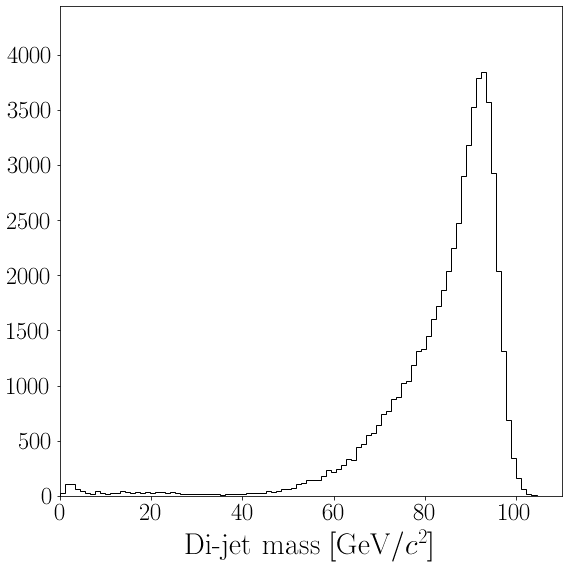

In [14]:
plotting.hist_plot(ak.flatten(jets["j1_j2_mass"]),"dijet_mass","Di-jet mass [GeV/$c^2$]",0.,110.,100)

The di-jet invariant mass peak is consistent with the $Z^0$ mass, as expected for two $b$-jets produced from a $Z^0$.

Next we plot the angle between the two jets:

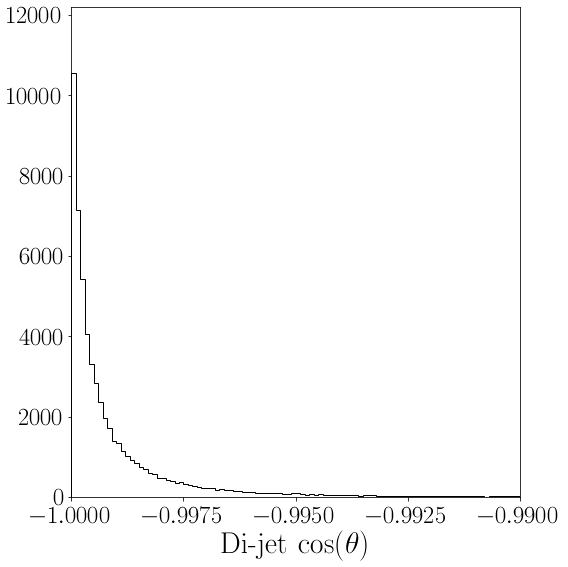

In [16]:
plotting.hist_plot(ak.flatten(jets["j1_j2_angle"]),"dijet_angle","Di-jet $\\cos(\\theta)$",-1.,-0.99,100)

The two jets are back-to-back according to the $\cos(\theta)$ distribution, as expected for a pair of $b$-jets produced from a $Z^0$.